In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import spacy
import string
from collections import Counter
from wordcloud import WordCloud
import collections

In [13]:
nlp = spacy.load('es_core_news_sm')

In [14]:
def sentimiento(num):
    if num == 0:
        num = 'Negativo'
    elif num == 1:
        num = 'Positivo'
    else:
        num = 'Neutral'
    return num


In [15]:
df = pd.read_csv('form_responses_with_sentiment.csv')

In [16]:
df.shape

(28, 8)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comentario    28 non-null     object
 1   carrera       28 non-null     object
 2   autorizacion  28 non-null     object
 3   semestre      28 non-null     object
 4   edad          28 non-null     int64 
 5   usuario       28 non-null     object
 6   rol           28 non-null     object
 7   Sentimiento   28 non-null     int64 
dtypes: int64(2), object(6)
memory usage: 1.9+ KB


In [19]:
df['Sentimiento'] = df['Sentimiento'].apply(sentimiento)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comentario    28 non-null     object
 1   carrera       28 non-null     object
 2   autorizacion  28 non-null     object
 3   semestre      28 non-null     object
 4   edad          28 non-null     int64 
 5   usuario       28 non-null     object
 6   rol           28 non-null     object
 7   Sentimiento   28 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.9+ KB


In [22]:
df = df.loc[df.autorizacion == "Sí"]
df.shape

(28, 8)

In [23]:
df.isnull().sum()

comentario      0
carrera         0
autorizacion    0
semestre        0
edad            0
usuario         0
rol             0
Sentimiento     0
dtype: int64

In [24]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
comentario,28,28,Me encanta que el CRAI tenga tantos recursos t...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carrera,28,12,Ingeniería de Datos e Inteligencia Artificial,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
autorizacion,28,1,Sí,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
semestre,28,8,Segundo,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edad,28.0,NaN,NaN,NaN,20.285714,5.89323,17.0,17.0,18.0,20.25,44.0
usuario,28,28,valeria.diaz@uao.edu.co,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rol,28,2,Estudiante,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sentimiento,28,3,Positivo,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN


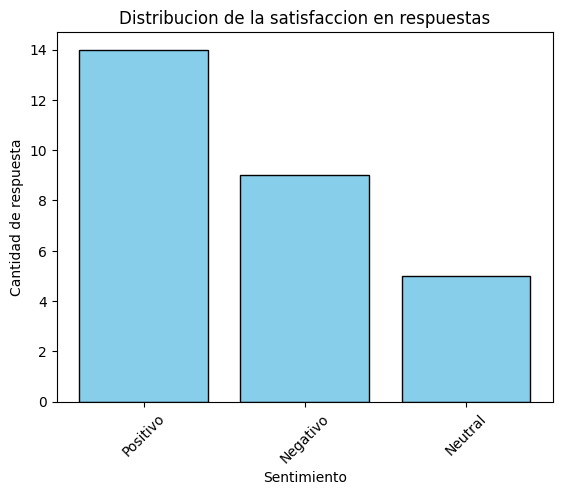

In [26]:
conteo_sentimiento = df['Sentimiento'].value_counts()
fig, ax = plt.subplots()
ax.bar(conteo_sentimiento.index,conteo_sentimiento.values, color = "skyblue", edgecolor = "black")
ax.set_xlabel('Sentimiento')
ax.set_ylabel('Cantidad de respuesta')
ax.set_title('Distribucion de la satisfaccion en respuestas')
plt.xticks(rotation=45)
plt.show()

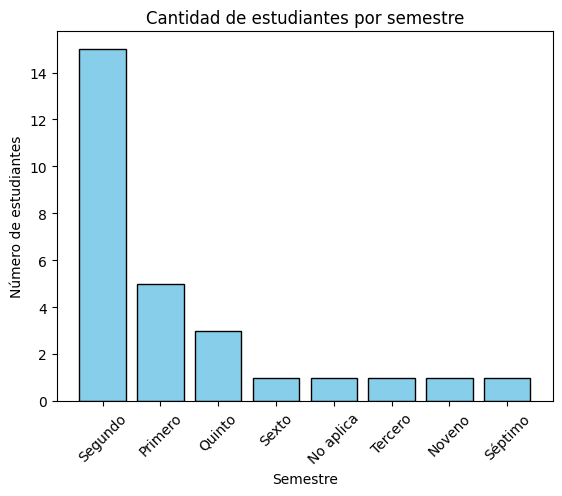

In [27]:
conteo_semestre = df['semestre'].value_counts()
fig, ax = plt.subplots()
ax.bar(conteo_semestre.index,conteo_semestre.values, color = "skyblue", edgecolor = "black")
ax.set_xlabel('Semestre')
ax.set_ylabel('Número de estudiantes')
ax.set_title('Cantidad de estudiantes por semestre')
plt.xticks(rotation=45)
plt.show()


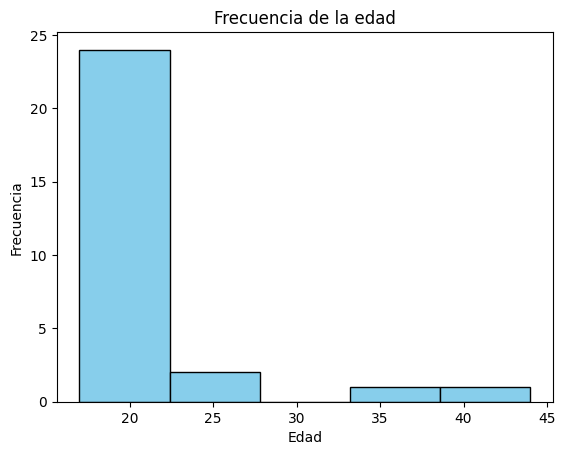

In [28]:
edad = df.edad.values
fig, ax = plt.subplots()
puntos = math.floor(1+3.322*math.log10(len(edad)))

ax.hist(edad,color = "skyblue", edgecolor = "black", bins= puntos)
plt.title("Frecuencia de la edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

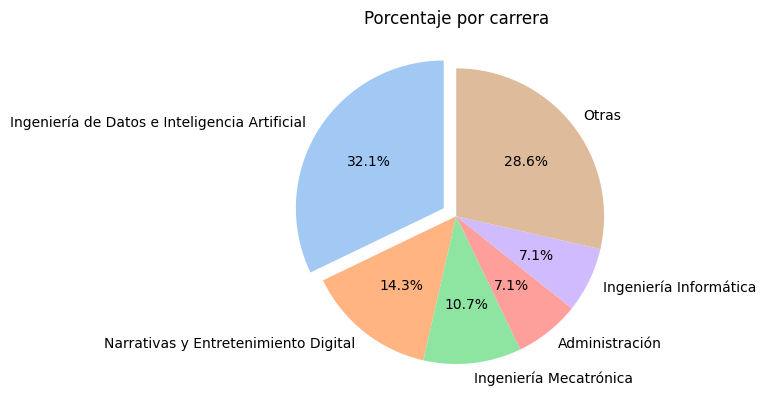

In [29]:
porcentajecarrera = df["carrera"].value_counts(normalize=True)
top_carreras = porcentajecarrera.head(5)
otros_porcentaje = porcentajecarrera[5:].sum()

etiquetas = top_carreras.index.tolist()
etiquetas.append("Otras")
porcentajes = top_carreras.tolist()
porcentajes.append(otros_porcentaje)

colores = sns.color_palette("pastel")
explode = (0.1, 0, 0, 0, 0, 0)
fig, ax = plt.subplots()
ax.pie(porcentajes, labels=etiquetas, autopct="%1.1f%%", colors=colores, startangle=90, explode=explode)
ax.set_title("Porcentaje por carrera")

plt.show()

# **visualización de los comentarios haciendo uso del PLN**


In [30]:
stopwords = spacy.lang.es.stop_words.STOP_WORDS

In [31]:
def limpiar_texto(texto):
    texto_limpio = ""
    for token in texto:
        if token.text.lower() not in stopwords and token.text not in string.punctuation:
            texto_limpio += token.text.lower() + " "
    return texto_limpio.strip()

In [32]:
texto_completo = " ".join(df["comentario"])
doc = nlp(texto_completo)
texto_limpio = limpiar_texto(doc)
doc_limpio = nlp(texto_limpio)

In [33]:
frases_clave = [token.text for token in doc_limpio if token.pos_ in ("NOUN", "ADJ")]
frases_clave_frecuencia = Counter(frases_clave)

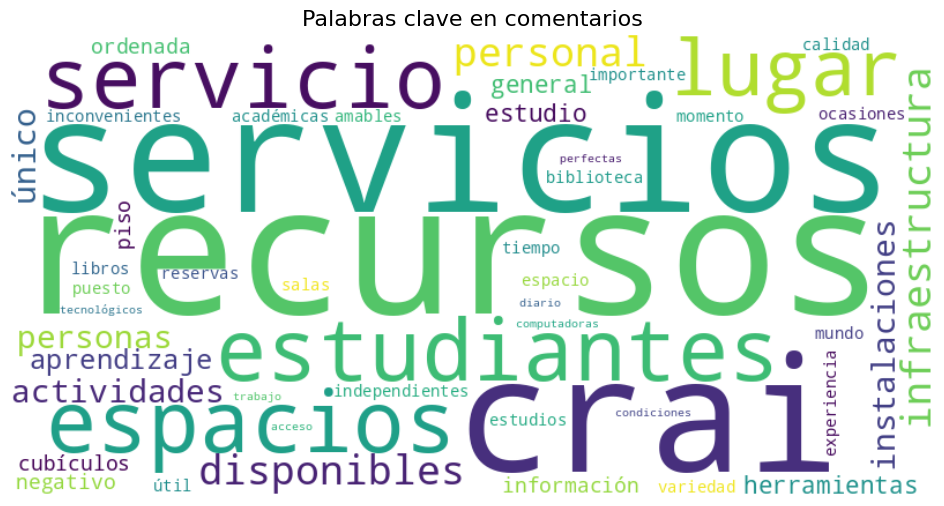

In [34]:
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis",
                      max_words=50, relative_scaling=0.5).generate_from_frequencies(frases_clave_frecuencia)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Palabras clave en comentarios", fontsize=16)
plt.axis("off")
plt.show()

In [57]:
x = list(df.semestre.unique())
x.sort()

In [59]:
semestre_sentimiento = {
            'carrera' : x,
            'negativo' : '',
            'positivo' : '',
            'neutral' : '',
}

In [62]:
semestre_sentimiento_df = pd.DataFrame(semestre_sentimiento)
semestre_sentimiento_df

,carrera,negativo,positivo,neutral
0,No aplica,,,
1,Noveno,,,
2,Primero,,,
3,Quinto,,,
4,Segundo,,,
5,Sexto,,,
6,Séptimo,,,
7,Tercero,,,


from matplotlib import pyplot as plt
import seaborn as sns
semestre_sentimiento_df.groupby('carrera').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [193]:
Negativo = []
Positivo = []
Neutral = []

In [194]:
No_Aplica = (collections.Counter(df.loc[df.semestre == 'No aplica']['Sentimiento'].values).items())
No_Aplica = sorted(No_Aplica, key=lambda x: x[1], reverse=True)

Positivo.append(0)
Neutral.append(0)
Negativo.append(No_Aplica[0][1])

In [195]:
Noveno = (collections.Counter(df.loc[df.semestre == 'Noveno']['Sentimiento'].values).items())
Noveno = sorted(Noveno, key=lambda x: x[1], reverse=True)

Positivo.append(0)
Neutral.append(0)
Negativo.append(Noveno[0][1])

In [196]:
Primero = (collections.Counter(df.loc[df.semestre == 'Primero']['Sentimiento'].values).items())
Primero = sorted(Primero, key=lambda x: x[1], reverse=True)

Positivo.append(Primero[0][1])
Neutral.append(Primero[1][1])
Negativo.append(Primero[2][1])

In [197]:
Quinto = (collections.Counter(df.loc[df.semestre == 'Quinto']['Sentimiento'].values).items())
Quinto = sorted(Quinto, key=lambda x: x[1], reverse=True)

Positivo.append(Quinto[0][1])
Neutral.append(Quinto[1][1])
Negativo.append(0)

In [198]:
Segundo = (collections.Counter(df.loc[df.semestre == 'Segundo']['Sentimiento'].values).items())
Segundo = sorted(Segundo, key=lambda x: x[1], reverse=True)

Positivo.append(Segundo[0][1])
Neutral.append(Segundo[2][1])
Negativo.append(Segundo[1][1])

In [199]:
Sexto = (collections.Counter(df.loc[df.semestre == 'Sexto']['Sentimiento'].values).items())
Sexto = sorted(Sexto, key=lambda x: x[1], reverse=True)

Positivo.append(0)
Neutral.append(0)
Negativo.append(Sexto[0][1])

In [200]:
Septimo = (collections.Counter(df.loc[df.semestre == 'Séptimo']['Sentimiento'].values).items())
Septimo = sorted(Septimo, key=lambda x: x[1], reverse=True)

Positivo.append(0)
Neutral.append(0)
Negativo.append(Septimo[0][1])

In [201]:
Tercero = (collections.Counter(df.loc[df.semestre == 'Tercero']['Sentimiento'].values).items())
Tercero = sorted(Tercero, key=lambda x: x[1], reverse=True)

Positivo.append(Tercero[0][1])
Neutral.append(0)
Negativo.append(0)

In [203]:
Positivo = pd.Series(Positivo)

In [204]:
Negativo = pd.Series(Negativo)

In [205]:
Neutral = pd.Series(Neutral)

In [206]:
semestre_sentimiento_df['negativo'] = Negativo
semestre_sentimiento_df['positivo'] = Positivo
semestre_sentimiento_df['neutral'] = Neutral

In [207]:
semestre_sentimiento_df

,carrera,negativo,positivo,neutral
0,No aplica,1,0,0
1,Noveno,1,0,0
2,Primero,1,2,2
3,Quinto,0,2,1
4,Segundo,4,9,2
5,Sexto,1,0,0
6,Séptimo,1,0,0
7,Tercero,0,1,0


In [218]:
semestre_sentimiento_df.set_index('carrera', inplace=True)

In [219]:
semestre_sentimiento_df

,negativo,positivo,neutral
carrera,,,
No aplica,1,0,0
Noveno,1,0,0
Primero,1,2,2
Quinto,0,2,1
Segundo,4,9,2
Sexto,1,0,0
Séptimo,1,0,0
Tercero,0,1,0


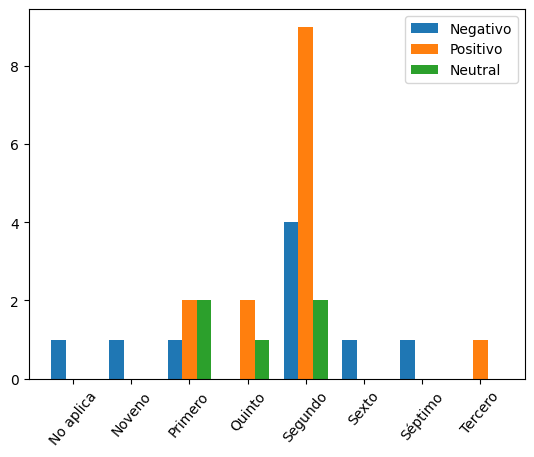

In [223]:
n = len(semestre_sentimiento_df.index)
x = np.arange(n)
width = 0.25
plt.bar(x - width, semestre_sentimiento_df.negativo, width=width, label='Negativo')
plt.bar(x, semestre_sentimiento_df.positivo, width=width, label='Positivo')
plt.bar(x + width, semestre_sentimiento_df.neutral, width=width, label='Neutral')
plt.xticks(x, semestre_sentimiento_df.index)
plt.xticks(rotation= 50)
plt.legend(loc='best')
plt.show()